In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
review_data = pd.read_csv('/content/Restaurant_Reviews.tsv', sep='\t')

In [10]:
review_data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [11]:
review_data.shape

(1000, 2)

In [12]:
# checking missing values
review_data.isnull().sum()

,0
Review,0
Liked,0


In [13]:
# checking the balance of the dataset
review_data['Liked'].value_counts()

,count
Liked,
1,500
0,500


In [14]:
# counting the length of each review
review_data['Review_Length'] = review_data['Review'].apply(len)

In [15]:
review_data.head()

,Review,Liked,Review_Length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [16]:
review_data.head()

,Review,Liked,Review_Length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [17]:
# counting no. of words
review_data['Words_count'] = review_data['Review'].apply(lambda x: len(x.split()))

In [18]:
review_data.head()

,Review,Liked,Review_Length,Words_count
0,Wow... Loved this place.,1,24,4
1,Crust is not good.,0,18,4
2,Not tasty and the texture was just nasty.,0,41,8
3,Stopped by during the late May bank holiday of...,1,87,15
4,The selection on the menu was great and so wer...,1,59,12


In [19]:
# counting the sentences in each review
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [20]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [21]:
# counting the sentences in each review
review_data['Sentences_count'] = review_data['Review'].apply(lambda x: len(nltk.sent_tokenize(str(x))))

In [22]:
review_data.head()

,Review,Liked,Review_Length,Words_count,Sentences_count
0,Wow... Loved this place.,1,24,4,2
1,Crust is not good.,0,18,4,1
2,Not tasty and the texture was just nasty.,0,41,8,1
3,Stopped by during the late May bank holiday of...,1,87,15,1
4,The selection on the menu was great and so wer...,1,59,12,1


In [23]:
# avg review_length of positive reviews
review_data[review_data['Liked']==1]['Review_Length'].mean()

55.88

In [24]:
# avg review_length of negative reviews
review_data[review_data['Liked']==0]['Review_Length'].mean()

60.75

In [25]:
import re

In [26]:
# removing non-alphabetic terms and replace them with a space
review_data['Review'] = review_data['Review'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x))

In [27]:
review_data.head()

,Review,Liked,Review_Length,Words_count,Sentences_count
0,Wow Loved this place,1,24,4,2
1,Crust is not good,0,18,4,1
2,Not tasty and the texture was just nasty,0,41,8,1
3,Stopped by during the late May bank holiday of...,1,87,15,1
4,The selection on the menu was great and so wer...,1,59,12,1


In [28]:
# convert reviews in lower cases
review_data['Review'] = review_data['Review'].apply(lambda x: x.lower())

In [29]:
review_data.head()

,Review,Liked,Review_Length,Words_count,Sentences_count
0,wow loved this place,1,24,4,2
1,crust is not good,0,18,4,1
2,not tasty and the texture was just nasty,0,41,8,1
3,stopped by during the late may bank holiday of...,1,87,15,1
4,the selection on the menu was great and so wer...,1,59,12,1


In [30]:
# split the review
review_data['Review'] = review_data['Review'].apply(lambda x: x.split())

In [31]:
review_data.head()

,Review,Liked,Review_Length,Words_count,Sentences_count
0,"[wow, loved, this, place]",1,24,4,2
1,"[crust, is, not, good]",0,18,4,1
2,"[not, tasty, and, the, texture, was, just, nasty]",0,41,8,1
3,"[stopped, by, during, the, late, may, bank, ho...",1,87,15,1
4,"[the, selection, on, the, menu, was, great, an...",1,59,12,1


In [32]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [33]:
from nltk.corpus import stopwords

In [34]:
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

In [35]:
all_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [36]:
# removing the stopwords from review
# these words dont contribute to the meaningful information of the sentence
review_data['Review'] = review_data['Review'].apply(lambda x: [word for word in x if word not in all_stopwords])

In [37]:
review_data.head()

,Review,Liked,Review_Length,Words_count,Sentences_count
0,"[wow, loved, place]",1,24,4,2
1,"[crust, not, good]",0,18,4,1
2,"[not, tasty, texture, nasty]",0,41,8,1
3,"[stopped, late, may, bank, holiday, rick, stev...",1,87,15,1
4,"[selection, menu, great, prices]",1,59,12,1


In [38]:
# stemming - tet normalisation technique used in NLP
from nltk.stem.porter import PorterStemmer

In [39]:
ps = PorterStemmer()

In [40]:
# perform stemming
review_data['Review'] = review_data['Review'].apply(lambda x: [ps.stem(word) for word in x])

In [41]:
# joinig the review
review_data['Review'] = review_data['Review'].apply(lambda x: ' '.join(x))

In [42]:
review_data.head()

,Review,Liked,Review_Length,Words_count,Sentences_count
0,wow love place,1,24,4,2
1,crust not good,0,18,4,1
2,not tasti textur nasti,0,41,8,1
3,stop late may bank holiday rick steve recommen...,1,87,15,1
4,select menu great price,1,59,12,1


In [43]:
from wordcloud import WordCloud

In [44]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [46]:
# display wordcount for positive review
pos = wc.generate(review_data[review_data['Liked']==1]['Review'].str.cat(sep=' '))

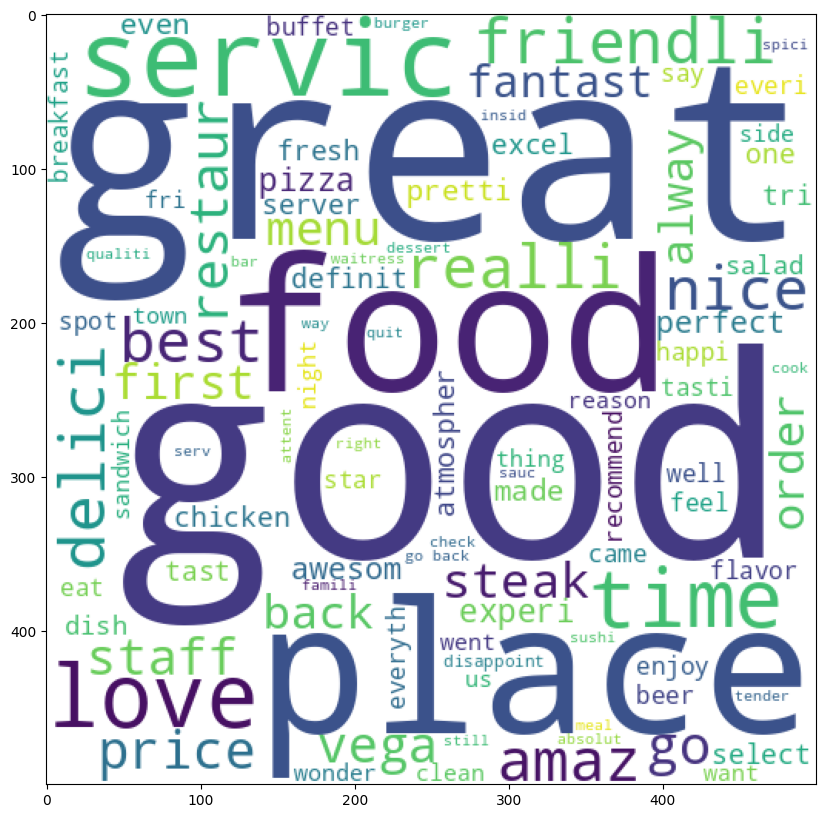

In [47]:
plt.figure(figsize=(10,10))
plt.imshow(pos)

In [48]:
# display wordcount for negative review
pos = wc.generate(review_data[review_data['Liked']==0]['Review'].str.cat(sep=' '))

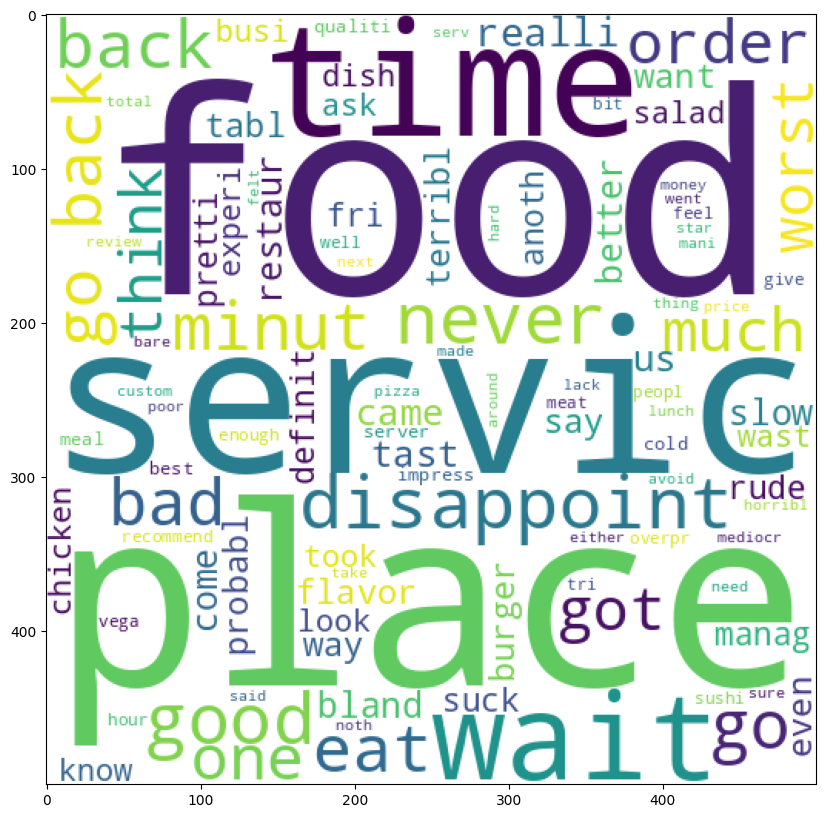

In [49]:
plt.figure(figsize=(10,10))
plt.imshow(pos)

In [50]:
review_data.head()

,Review,Liked,Review_Length,Words_count,Sentences_count
0,wow love place,1,24,4,2
1,crust not good,0,18,4,1
2,not tasti textur nasti,0,41,8,1
3,stop late may bank holiday rick steve recommen...,1,87,15,1
4,select menu great price,1,59,12,1


In [45]:
# we cant train machine learning model on tet directly,
# so we have to convert this tet into numerical values
# we are going to use bag of words technique which is directly aavailable as count vectorisor

In [51]:
# converting the reviews into vector
from sklearn.feature_extraction.text import CountVectorizer

In [58]:
cv = CountVectorizer(max_features=1500)
# lower number is better

In [61]:
corpus = review_data['Review'].tolist()

In [64]:
A = cv.fit_transform(corpus).toarray()

In [65]:
A

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [66]:
A.shape

(1000, 1500)

In [67]:
B = review_data['Liked']

In [68]:
B

,Liked
0,1
1,0
2,0
3,1
4,1
...,...
995,0
996,0
997,0
998,0


In [69]:
from sklearn.model_selection import train_test_split

In [70]:
A_train, A_test, Y_train, Y_test = train_test_split(A, B, test_size=0.2, random_state=42)

In [71]:
from sklearn.naive_bayes import GaussianNB

In [72]:
nb= GaussianNB()
nb.fit(A_train, Y_train)
y_pred = nb.predict(A_test)

In [73]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [74]:
accuracy_score(Y_test, y_pred)

0.67

In [75]:
# now lets try from logictic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(A_train, Y_train)
y_pred = lr.predict(A_test)
accuracy_score(Y_test, y_pred)

0.765

In [76]:
# from Random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(A_train, Y_train)
y_pred = rf.predict(A_test)
accuracy_score(Y_test, y_pred)

0.74

In [77]:
# save the model
import joblib

In [78]:
joblib.dump(rf, 'Restaurant_review_classification')

['Restaurant_review_classification']

In [80]:
!pip install -q nest-asyncio
import nest_asyncio
nest_asyncio.apply()

In [82]:
!pip install -q gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 98.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.2 MB/s eta 0:00:00


In [87]:
import joblib
joblib.dump(cv, 'vectorizer.joblib') # Save the fitted CountVectorizer

['vectorizer.joblib']

In [88]:
import gradio as gr
import joblib
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

# Load your pre-trained Random Forest model and CountVectorizer
model = joblib.load('Restaurant_review_classification')
# vectorizer = CountVectorizer(max_features=1500) # Assuming you used max_features=1500 during training
vectorizer = joblib.load('vectorizer.joblib')

# Preprocess function remains the same
def preprocess_text(text):
    custom_stopwords = {'don', "don't", 'ain', 'aren', "aren't", 'couldn', "couldn't",
                        'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't",
                        'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't",
                        'needn', "needn't", 'shan', "shan't", 'no', 'nor', 'not', 'shouldn', "shouldn't",
                        'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"}
    ps = PorterStemmer()
    stop_words = set(stopwords.words("english")) - custom_stopwords

    review = re.sub('[^a-zA-Z]', ' ', text)
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in stop_words]
    review = " ".join(review)

    return review

# Prediction function
def predict_sentiment(review_text):
    processed_input = preprocess_text(review_text)
    processed_input_vectorized = vectorizer.transform([processed_input])
    prediction = model.predict(processed_input_vectorized)[0]
    sentiment = "Positive" if prediction == 1 else "Negative"
    return sentiment

# Gradio interface
iface = gr.Interface(
    fn=predict_sentiment,
    inputs=gr.Textbox(lines=5, placeholder="Enter your restaurant review here..."), # This line is changed
    outputs="text",
    title="Restaurant Review Sentiment Analysis",
    description="Enter a review and see if it's positive or negative!",
)

iface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://cb9a6b9ca972e1923f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
